## Conclusiones

Este proyecto se centra en explorar la efectividad y la aplicabilidad de los algoritmos de Machine Learning en la creación de estrategias de trading. Aprovechando los avances en aprendizaje automático, se embarca en un análisis exhaustivo con el objetivo de maximizar la rentabilidad y el rendimiento mediante la implementación y ajuste fino de diversas estrategias.

El proyecto examina la eficacia de estos algoritmos al desglosar y comparar múltiples estrategias, entre ellas:

1. **Regresión Logística (Logistic Regression)**: Un método de clasificación que utiliza la función logística para modelar la probabilidad de una clase particular. Se adapta bien a problemas de clasificación binaria y es útil para identificar puntos de entrada y salida en el mercado.

2. **SVC (Support Vector Classifier)**: Un algoritmo de clasificación que busca encontrar el hiperplano óptimo que mejor separa las clases en un espacio de características. Es eficaz en la identificación de patrones complejos en los datos y puede ser utilizado para generar señales de compra y venta.

3. **XGBoost**: Un algoritmo de aprendizaje supervisado que utiliza un conjunto de árboles de decisión para realizar predicciones. XGBoost es conocido por su eficacia en la gestión de conjuntos de datos grandes y complejos, y puede ser utilizado para mejorar la precisión de las señales de trading.

A través de un análisis comparativo profundo, el proyecto busca descubrir información detallada sobre las estrategias de trading. Examina la capacidad de los modelos para adaptarse a los cambios del mercado, mitigar riesgos y maximizar los retornos.

La documentación del proyecto comprende una investigación exhaustiva de múltiples estrategias, proporcionando una visión completa de sus fortalezas, debilidades y aplicaciones potenciales en escenarios de trading reales. Además, se busca ofrecer un informe claro y completo que detalle el proceso, descubrimientos e ideas obtenidos durante esta exploración rigurosa.

## Importar

In [60]:
from DL.main import perform, perform_validation

import pandas as pd
import optuna
import matplotlib.pyplot as plt

commission_value = 0.0025
take_profit_value = 0.05
stop_loss_value = 0.05

# 1 Dia

In [61]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1d_train.csv')
data_validation = pd.read_csv('data/aapl_1d_test.csv')

data['Timestamp'] = pd.to_datetime(data['Date'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Date'])

In [62]:
# data['Timestamp'] = pd.to_datetime(data['Date'])
# data_validation['Timestamp'] = pd.to_datetime(data_validation['Date'])

data = data.head(140)
data_validation = data_validation.head(140) 
data

,Date,Open,High,Low,Close,Adjusted_close,Volume,Timestamp
0,2000-01-03,104.8768,112.5040,101.6848,111.9328,0.8472,535796800,2000-01-03
1,2000-01-04,108.2480,110.6224,101.1920,102.5024,0.7758,512377600,2000-01-04
2,2000-01-05,103.7456,110.5664,102.9952,104.0032,0.7872,778321600,2000-01-05
3,2000-01-06,106.1200,107.0048,94.9984,94.9984,0.7190,767972800,2000-01-06
4,2000-01-07,96.4992,101.0016,95.5024,99.5008,0.7531,460734400,2000-01-07
...,...,...,...,...,...,...,...,...
135,2000-07-17,58.2512,58.8112,57.1256,58.3128,0.8827,260002400,2000-07-17
136,2000-07-18,58.4976,58.8728,56.8736,57.2488,0.8666,318404800,2000-07-18
137,2000-07-19,55.1880,56.8120,51.7496,52.6848,0.7975,457872800,2000-07-19
138,2000-07-20,54.9976,57.0640,54.1240,55.1264,0.8345,465572800,2000-07-20


In [63]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)


c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
df_results

,gain,strategy,orders_executed
0,1.008699e+06,['lr'],176.0
1,1.014796e+06,['svc'],176.0
2,1.013893e+06,['xgboost'],176.0
3,1.011769e+06,"['lr', 'svc']",142.0
4,1.011316e+06,"['lr', 'xgboost']",131.0
5,1.014344e+06,"['svc', 'xgboost']",161.0
6,1.011216e+06,"['lr', 'svc', 'xgboost']",129.0


In [ ]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],"['lr', 'svc']","['lr', 'xgboost']","['svc', 'xgboost']","['lr', 'svc', 'xgboost']"
14,1000081.740764,1000081.740764,1000081.740764,1000081.740764,1000081.740764,1000081.740764,1000081.740764
15,1000199.683568,1000199.683568,1000199.683568,1000199.683568,1000199.683568,1000199.683568,1000199.683568
16,1000309.593704,1000309.593704,1000309.593704,1000309.593704,1000309.593704,1000309.593704,1000309.593704
17,1000419.313916,1000419.313916,1000419.313916,1000419.313916,1000419.313916,1000419.313916,1000419.313916
18,1000512.301328,1000512.301328,1000512.301328,1000512.301328,1000512.301328,1000512.301328,1000512.301328


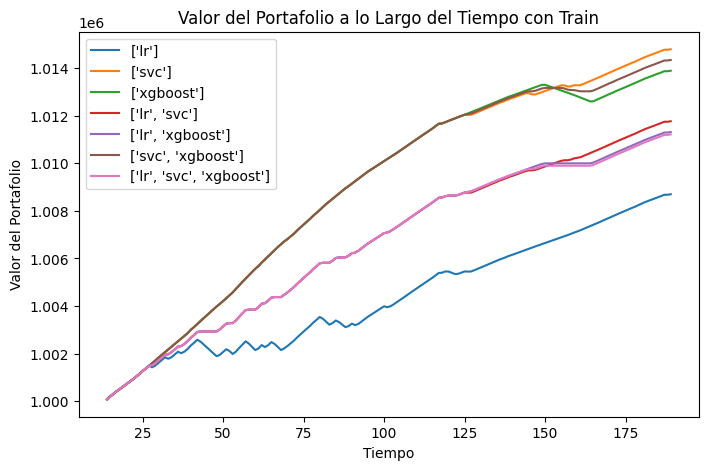

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [ ]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

In [ ]:
df_results

,gain,strategy,orders_executed
0,985591.959025,['lr'],126.0
1,987006.899025,['svc'],126.0
2,991668.159025,['xgboost'],126.0
3,986303.058100,"['lr', 'svc']",115.0
4,988635.772550,"['lr', 'xgboost']",89.0
5,989343.598075,"['svc', 'xgboost']",88.0
6,989434.684850,"['lr', 'svc', 'xgboost']",83.0


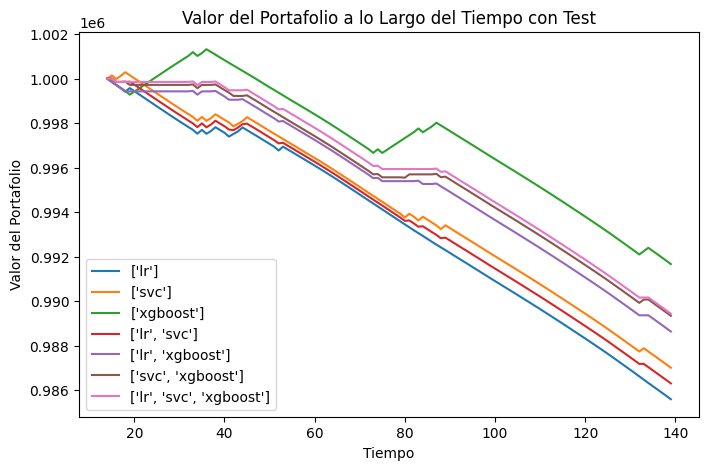

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 1 Hora

In [ ]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1h_train.csv')
data_validation = pd.read_csv('data/aapl_1h_test.csv')

data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

In [ ]:
# data['Timestamp'] = pd.to_datetime(data['Datetime'])
# data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

data = data.head(140)
data_validation = data_validation.head(140) 
data

,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,2020-10-12 13:30:00,0,2020-10-12 13:30:00,120.059997,121.330101,119.284500,120.919998,48082766.0
1,2020-10-12 14:30:00,0,2020-10-12 14:30:00,120.919998,122.639999,120.769996,122.529998,27028067.0
2,2020-10-12 15:30:00,0,2020-10-12 15:30:00,122.525001,123.629997,122.290000,123.261001,35722193.0
3,2020-10-12 16:30:00,0,2020-10-12 16:30:00,123.260002,124.000000,123.040000,123.930000,22891159.0
4,2020-10-12 17:30:00,0,2020-10-12 17:30:00,124.089996,125.180000,123.910003,125.050003,31443470.0
...,...,...,...,...,...,...,...,...
135,2020-11-06 16:30:00,0,2020-11-06 16:30:00,118.129997,119.190002,118.019996,118.430000,15537555.0
136,2020-11-06 17:30:00,0,2020-11-06 17:30:00,118.434997,119.199996,118.434997,119.105003,9005115.0
137,2020-11-06 18:30:00,0,2020-11-06 18:30:00,119.110000,119.169998,118.839996,118.889999,6986160.0
138,2020-11-06 19:30:00,0,2020-11-06 19:30:00,118.889999,119.040000,118.089996,118.365997,11964278.0


In [ ]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)

KeyboardInterrupt: 

In [ ]:
df_results

,gain,strategy,orders_executed
0,985591.959025,['lr'],126.0
1,987006.899025,['svc'],126.0
2,991668.159025,['xgboost'],126.0
3,986303.058100,"['lr', 'svc']",115.0
4,988635.772550,"['lr', 'xgboost']",89.0
5,989343.598075,"['svc', 'xgboost']",88.0
6,989434.684850,"['lr', 'svc', 'xgboost']",83.0


In [ ]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],"['lr', 'svc']","['lr', 'xgboost']","['svc', 'xgboost']","['lr', 'svc', 'xgboost']"
14,1000005.2827,999994.0027,1000005.2827,1000000,1000005.2827,1000000,1000000
15,999861.7648,1000147.6048,999861.7648,1000005.0421,999861.7648,1000005.0421,1000005.0421
16,999719.34965,999992.18965,999719.34965,999856.4821,999719.34965,999856.4821,999856.4821
17,999581.916925,1000128.936925,999581.916925,999856.4821,999581.916925,999856.4821,999856.4821
18,999416.427025,1000293.767025,999449.627025,999856.4821,999433.356925,999872.7522,999856.4821


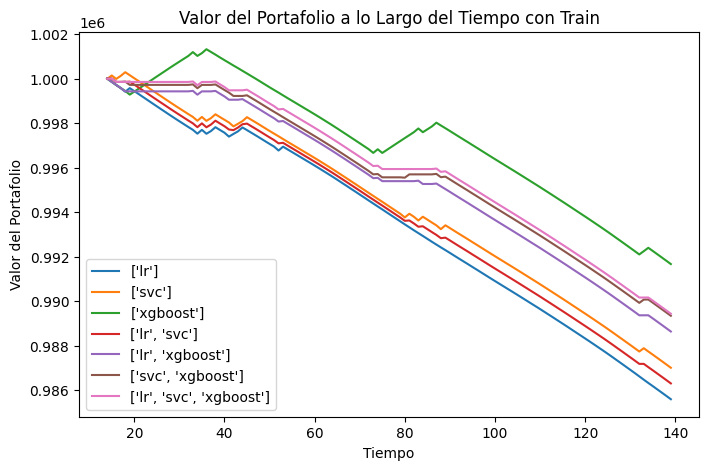

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [ ]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

KeyboardInterrupt: 

In [ ]:
df_results

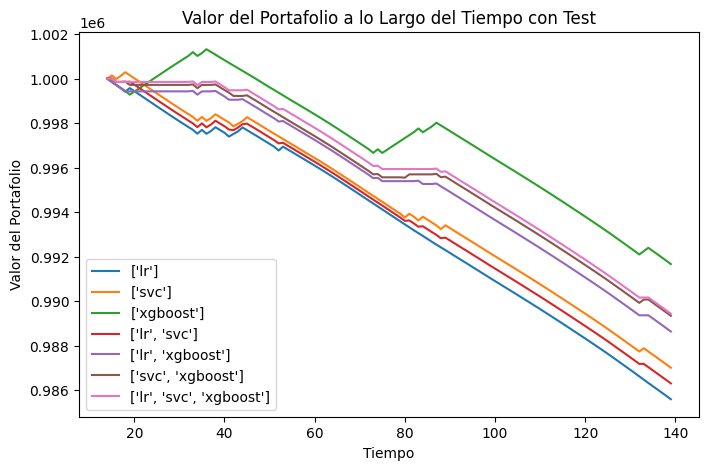

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 5 Min

In [ ]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_5m_train.csv')
data_validation = pd.read_csv('data/aapl_5m_test.csv')

data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

In [ ]:
# data['Timestamp'] = pd.to_datetime(data['Datetime'])
# data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

data = data.head(140)
data_validation = data_validation.head(140) 
data

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,2021-01-04 14:30:00,0,2021-01-04 14:30:00,133.570007,133.611602,132.389999,132.809997,6624663.0
1,1,2021-01-04 14:35:00,0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,2541553.0
2,2,2021-01-04 14:40:00,0,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,2492415.0
3,3,2021-01-04 14:45:00,0,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,1859131.0
4,4,2021-01-04 14:50:00,0,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,1780105.0
...,...,...,...,...,...,...,...,...,...
135,135,2021-01-05 19:15:00,0,2021-01-05 19:15:00,131.125000,131.240005,131.050003,131.229995,946361.0
136,136,2021-01-05 19:20:00,0,2021-01-05 19:20:00,131.222396,131.250000,131.059997,131.125000,827361.0
137,137,2021-01-05 19:25:00,0,2021-01-05 19:25:00,131.134994,131.184997,131.029998,131.110000,846373.0
138,138,2021-01-05 19:30:00,0,2021-01-05 19:30:00,131.110000,131.380004,131.110000,131.335006,900569.0


## Train

In [ ]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)

c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
df_results

In [ ]:
combined_values_df.head()

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [ ]:
data_validation = data_validation.head(120)

In [ ]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

In [ ]:
df_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 1 Min

In [ ]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1m_train.csv')
data_validation = pd.read_csv('data/aapl_1m_test.csv')

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

data = data.head(140)
data_validation = data_validation.head(140) 
data

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,2023-01-03 09:00:00,0,2023-01-03 09:00:00,130.28,131.00,130.28,131.00,8174
1,1,2023-01-03 09:01:00,0,2023-01-03 09:01:00,130.87,131.17,130.87,131.10,8820
2,2,2023-01-03 09:02:00,0,2023-01-03 09:02:00,131.18,131.24,131.17,131.17,2112
3,3,2023-01-03 09:03:00,0,2023-01-03 09:03:00,131.19,131.29,131.19,131.28,3888
4,4,2023-01-03 09:04:00,0,2023-01-03 09:04:00,131.28,131.46,131.28,131.46,5984
...,...,...,...,...,...,...,...,...,...
135,135,2023-01-03 12:19:00,0,2023-01-03 12:19:00,130.66,130.66,130.59,130.62,1821
136,136,2023-01-03 12:20:00,0,2023-01-03 12:20:00,130.59,130.65,130.57,130.65,3027
137,137,2023-01-03 12:21:00,0,2023-01-03 12:21:00,130.65,130.65,130.64,130.65,2344
138,138,2023-01-03 12:22:00,0,2023-01-03 12:22:00,130.66,130.66,130.64,130.64,2194


## Train

In [ ]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)


In [ ]:
df_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [ ]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

In [ ]:
df_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()